<a href="https://colab.research.google.com/github/Shoutaa/UTS_Pengolahan-Citra/blob/main/UTS_2024_Pengolahan_Citra_Digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Image Histogram**

## A. Kode

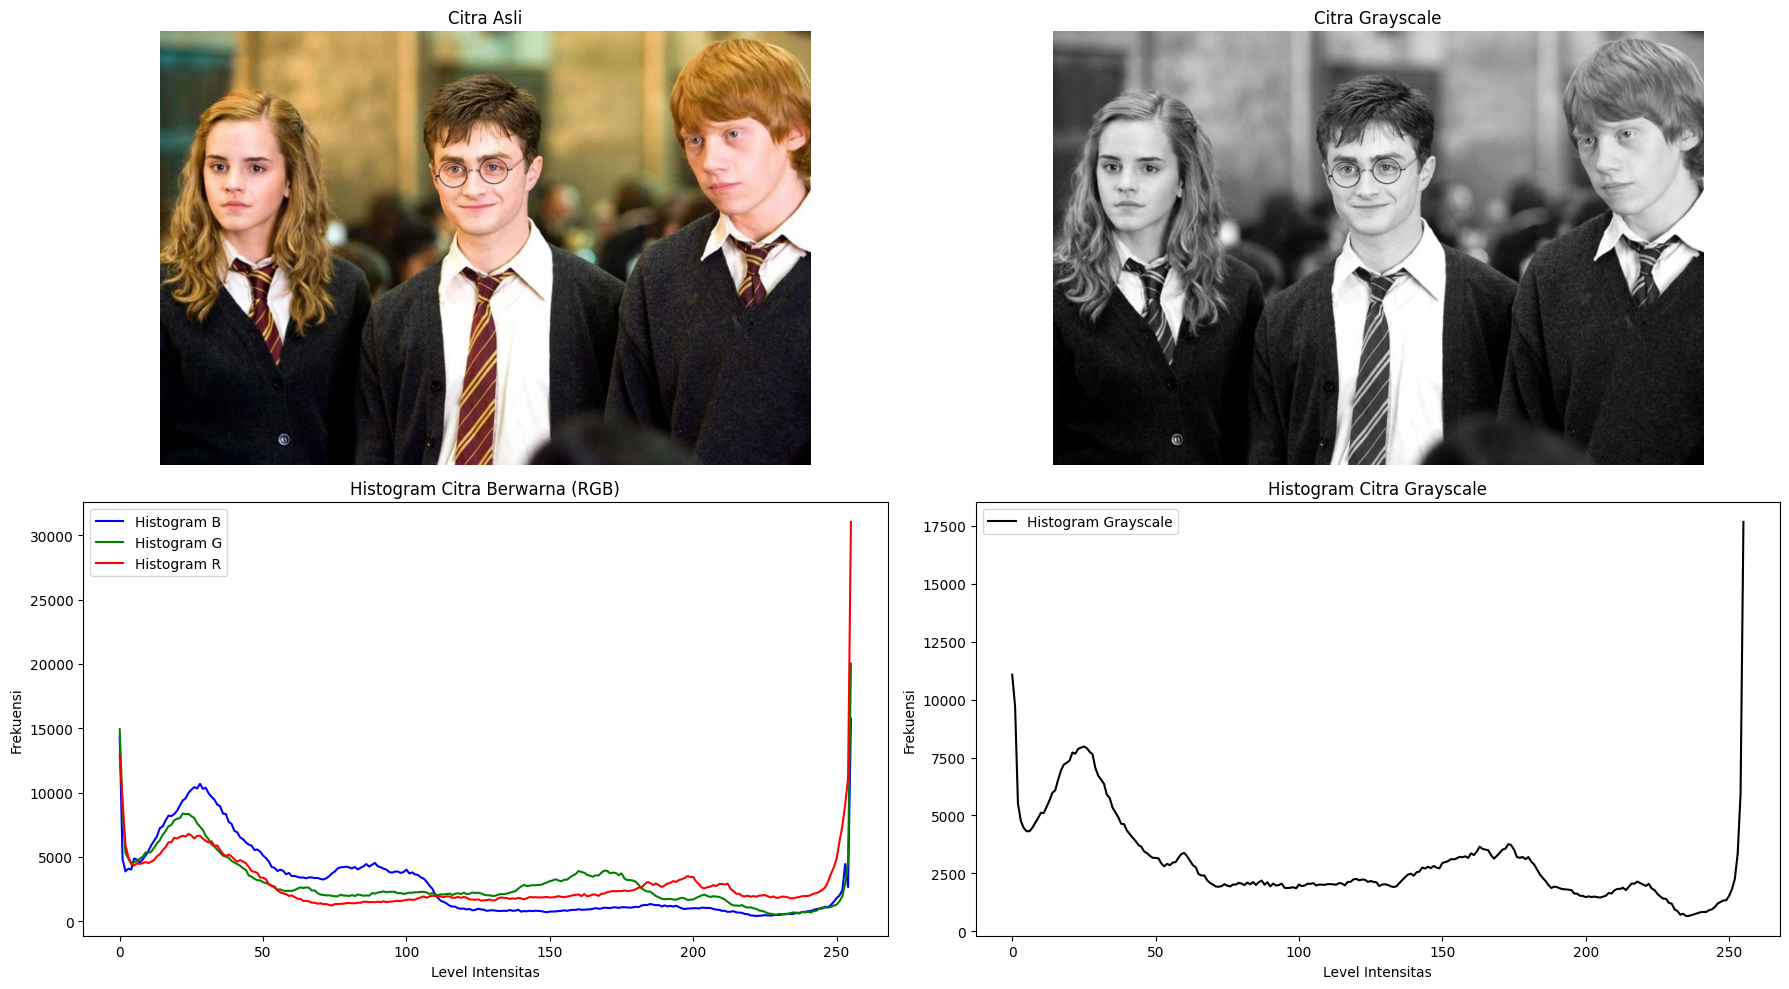

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Memuat citra asli (berwarna)
image_color = cv2.imread('Gryffindor.jpg')

# Konversi ke grayscale
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

# 2. Menghitung histogram untuk setiap kanal warna (RGB)
colors = ('b', 'g', 'r')
hist_colors = {}
for i, col in enumerate(colors):
    hist_colors[col] = cv2.calcHist([image_color], [i], None, [256], [0, 256])

# Menghitung histogram untuk citra grayscale
hist_gray = cv2.calcHist([image_gray], [0], None, [256], [0, 256])

# Normalisasi histogram (untuk grayscale dan setiap kanal warna)
hist_gray_normalized = hist_gray / hist_gray.sum()
hist_colors_normalized = {col: hist / hist.sum() for col, hist in hist_colors.items()}

# 3. Visualisasi
plt.figure(figsize=(18, 10))

# Menampilkan citra asli
plt.subplot(2, 2, 1)
image_rgb = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title("Citra Asli")
plt.axis('off')

# Menampilkan citra grayscale
plt.subplot(2, 2, 2)
plt.imshow(image_gray, cmap='gray')
plt.title("Citra Grayscale")
plt.axis('off')

# Menampilkan histogram untuk setiap kanal warna
plt.subplot(2, 2, 3)
for col in colors:
    plt.plot(hist_colors[col], label=f'Histogram {col.upper()}', color=col)
plt.title("Histogram Citra Berwarna (RGB)")
plt.xlabel("Level Intensitas")
plt.ylabel("Frekuensi")
plt.legend()

# Menampilkan histogram untuk citra grayscale
plt.subplot(2, 2, 4)
plt.plot(hist_gray, label='Histogram Grayscale', color='black')
plt.title("Histogram Citra Grayscale")
plt.xlabel("Level Intensitas")
plt.ylabel("Frekuensi")
plt.legend()



plt.tight_layout()
plt.show()


## B. Penjelasan

**Histogram Warna (RGB):**

Histogram warna ditampilkan di kiri bawah, dengan distribusi intensitas piksel untuk masing-masing kanal:

* Histogram Biru (Blue): Garis biru menunjukkan distribusi intensitas warna biru.
* Histogram Hijau (Green): Garis hijau menunjukkan distribusi intensitas warna hijau.
* Histogram Merah (Red): Garis merah menunjukkan distribusi intensitas warna merah.

Apa yang diamati?

* Puncak Histogram: Puncak menunjukkan intensitas warna yang paling banyak muncul dalam gambar. Misalnya, jika garis merah memiliki puncak tinggi di intensitas 150, artinya banyak piksel yang memiliki warna merah dengan intensitas sekitar 150.
* Rentang Intensitas: Rentang intensitas warna yang digunakan dalam gambar dapat diamati. Jika histogram menyebar dari 0 hingga 255, berarti warna dalam gambar bervariasi dari gelap ke terang.
---
**Histogram Grayscale:**

Histogram grayscale ditampilkan di kanan bawah, dengan garis hitam yang menunjukkan distribusi intensitas piksel dalam citra grayscale.

Apa yang diamati?
* Puncak Histogram: Puncak menunjukkan intensitas kecerahan yang dominan dalam gambar. Misalnya, jika puncak berada di sekitar intensitas 200, artinya sebagian besar piksel pada citra grayscale memiliki tingkat kecerahan tinggi.
* Rentang Intensitas: Rentang histogram menunjukkan seberapa gelap atau terang gambar secara keseluruhan:
 * ika histogram terkonsentrasi di area intensitas rendah (0–50), berarti gambar cenderung gelap.
 * Jika terkonsentrasi di area intensitas tinggi (200–255), berarti gambar cenderung terang.

# **2. Operasi Konvolusi**

## A. Kode

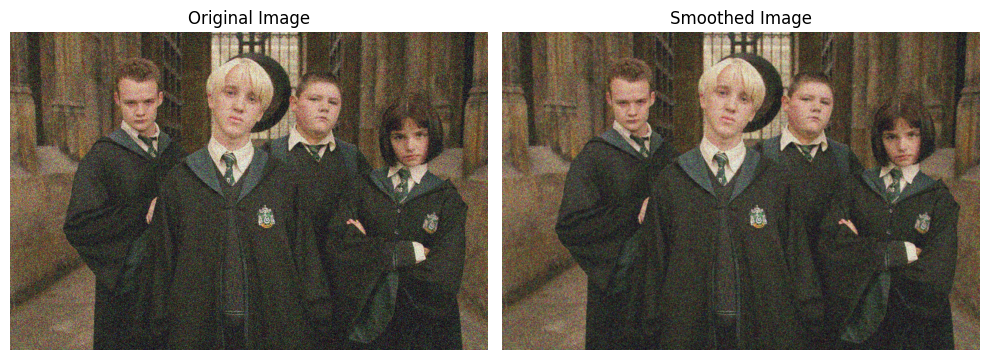

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mengunggah gambar dari perangkat lokal
original_image = cv2.imread('Slytherin.jpg')

# Kernel rata-rata 3x3 untuk smoothing/blurring
average_kernel = np.ones((3, 3), dtype=np.float32) / 9

# Fungsi untuk menerapkan konvolusi pada gambar berwarna
def apply_convolution_to_color_image(img, kernel):
    # Memisahkan gambar menjadi saluran warna B, G, dan R
    blue, green, red = cv2.split(img)
    processed_channels = []

    # Melakukan konvolusi untuk setiap saluran
    for channel in (blue, green, red):
        # Terapkan filter menggunakan fungsi cv2.filter2D untuk efisiensi
        filtered_channel = cv2.filter2D(channel, -1, kernel)
        processed_channels.append(filtered_channel)

    # Menggabungkan kembali saluran yang sudah diproses
    return cv2.merge(processed_channels)

# Terapkan konvolusi ke gambar asli
smoothed_image = apply_convolution_to_color_image(original_image, average_kernel)

# Menampilkan gambar asli dan gambar yang sudah di-blur
plt.figure(figsize=(10, 5))

# Menampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Menampilkan hasil konvolusi
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2RGB))
plt.title("Smoothed Image")
plt.axis("off")

plt.tight_layout()
plt.show()


## B. Penjelasan

setelah melakukan konvolusi memberikan beberapa perubahan signifikan pada gambar:

1. **Mengurangi Noise:**
   - Noise atau bintik-bintik kecil pada gambar cenderung diratakan sehingga tampak lebih halus. Pada gambar "Slytherin," noise pada tekstur dinding dan pakaian menjadi kurang terlihat setelah smoothing.

2. **Mengurangi Detail Halus:**
   - Selain noise, detail kecil seperti garis halus atau tekstur juga ikut diratakan. Ini membuat area dengan banyak detail menjadi lebih lembut.

3. **Menghasilkan Efek Buram (Blur):**
   - Smoothing menyebabkan area yang seharusnya memiliki kontras tinggi (misalnya, tepi objek) menjadi lebih buram. Pada gambar, kontur wajah, rambut, dan pakaian menjadi kurang tajam setelah konvolusi.

4. **Mempertahankan Struktur Global:**
   - Meskipun detail halus diratakan, struktur besar atau pola global (seperti posisi orang dalam gambar) tetap terlihat jelas.

Hasil pada gambar menunjukkan smoothing berhasil mengurangi noise.

# **3. Transformasi Fourier**

## A. Kode

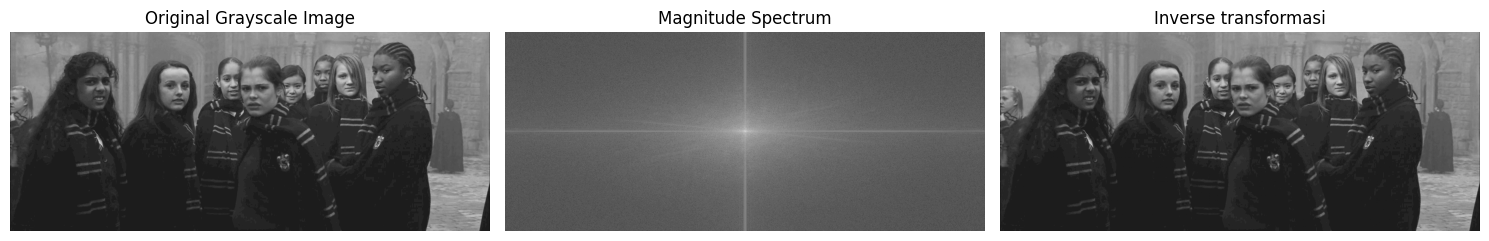

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar grayscale
image_path = 'Ravenclaw.jpg'
grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Melakukan Transformasi Fourier
fourier_transform = np.fft.fft2(grayscale_image)
fourier_shift = np.fft.fftshift(fourier_transform)  # Pusatkan frekuensi rendah
magnitude_spectrum = 20 * np.log(np.abs(fourier_shift))  # Skala logaritmik

# Invers Transformasi Fourier
inverse_shift = np.fft.ifftshift(fourier_shift)  # Kembalikan ke domain asal
reconstructed_image = np.abs(np.fft.ifft2(inverse_shift))

# Menampilkan hasil
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(1, 3, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")

# Magnitude spectrum
plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis("off")

# Gambar hasil inverse transformasi
plt.subplot(1, 3, 3)
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Inverse transformasi")
plt.axis("off")

plt.tight_layout()
plt.show()


## B. Penjelasan

Magnitude spectrum memberikan informasi tentang kandungan frekuensi dalam sebuah citra. Frekuensi rendah pada magnitude spectrum, yang terletak di sekitar pusat, menunjukkan elemen-elemen citra yang berubah perlahan, seperti area yang memiliki gradasi warna atau intensitas yang halus. Sebaliknya, frekuensi tinggi, yang terletak di tepi magnitude spectrum, merepresentasikan detail-detail kecil dan perubahan tajam dalam citra, seperti tepi atau tekstur. Selain itu, pola dan orientasi dalam magnitude spectrum juga dapat memberikan informasi tentang arah dominan dari elemen-elemen citra, seperti garis-garis atau pola geometris.

Magnitude spectrum juga dapat digunakan untuk mengidentifikasi noise, di mana keberadaan noise sering ditandai oleh frekuensi tinggi yang menonjol secara tidak wajar. Selain itu, informasi ini berguna dalam evaluasi filter yang diterapkan pada citra, seperti filter *low-pass* untuk menghaluskan citra atau filter *high-pass* untuk menonjolkan tepi. Secara keseluruhan, magnitude spectrum membantu dalam menganalisis struktur global dan detail lokal dari sebuah citra, memberikan wawasan penting untuk berbagai aplikasi pemrosesan citra, seperti kompresi, restorasi, atau analisis pola.

# **4. Operasi Aritmatika Citra - Pencerahan**

## A. Kode

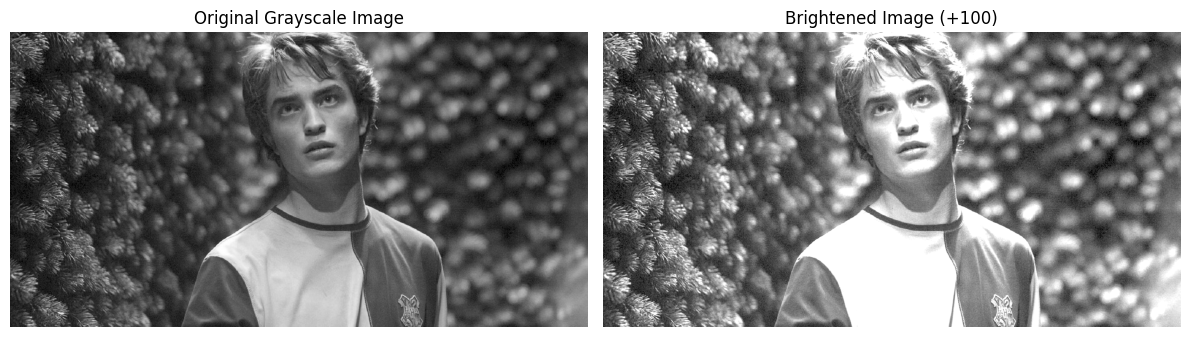

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar grayscale
image_path = 'Hufflepuff.jpg'
grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Nilai konstanta untuk pencerahan
brightness_constant = 100

# Menambahkan konstanta dengan clipping untuk mencegah overflow
brightened_image = cv2.add(grayscale_image, brightness_constant)

# Menampilkan hasil
plt.figure(figsize=(12, 6))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")

# Gambar setelah pencerahan
plt.subplot(1, 2, 2)
plt.imshow(brightened_image, cmap='gray')
plt.title(f"Brightened Image (+{brightness_constant})")
plt.axis("off")

plt.tight_layout()
plt.show()

## B. Penjelasan

Setelah pencerahan diterapkan pada citra, terdapat perubahan yang terjadi:

1. **Peningkatan Kecerahan Citra**  
   Meningkatkan intensitas piksel yang lebih gelap, menjadikan citra secara keseluruhan lebih terang. Setiap nilai intensitas piksel pada citra asli akan bertambah dengan nilai konstan tersebut, yang menyebabkan tampilan citra menjadi lebih cerah.

3. **Peningkatan Visualisasi Detail Citra**  
   Dengan menambahkan konstan untuk pencerahan, elemen-elemen yang lebih gelap dalam citra menjadi lebih jelas. Ini dapat memperbaiki kontras, membuat objek atau detail yang tadinya tersembunyi lebih terlihat.

citra yang telah diproses dengan pencerahan terlihat lebih terang dan lebih jelas